<a href="https://colab.research.google.com/github/sks9699/Barter-Recommendation_model/blob/main/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sks9699/leaf-class

100% 6.55G/6.56G [00:56<00:00, 209MB/s]
100% 6.56G/6.56G [00:56<00:00, 125MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-class.zip','r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [20]:
TRAIN_DIR = "./DATABASE"
ORG_DIR = "/content/dataset/dataset/train"
CLASS = ['Alstonia Scholaris',
         'Arjun',
         'Bael',
         'Basil',
         'Chinar',
         'Gauva',
         'Jamun',
         'Jatropha',
         'Lemon',
         'Mango',
         'Pomegranate',
         'Pongamia Pinnata']

In [21]:
import warnings
warnings.filterwarnings('ignore')
import os
import shutil
import glob

In [22]:

for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  if not os.path.exists(DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR,C)):
      SRC = img_path
      shutil.copy(SRC,DEST)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import keras

In [24]:
base_model = InceptionV3(input_shape=(256,256,3),include_top=False)

In [25]:
for layers in base_model.layers:
    layers.trainable= False

In [26]:
x = Flatten()(base_model.output)
x = Dense(units=12,activation='softmax')(x)

model = Model(base_model.input,x)


model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 127, 127, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 127, 127, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 127, 127, 32)         0         ['batch_normalization_94

In [27]:
train_datgen = ImageDataGenerator(featurewise_center=True,
                                  rotation_range=0.4,
                                  width_shift_range=0.3,
                                  horizontal_flip=True,
                                  preprocessing_function=preprocess_input,
                                  zoom_range=0.4,
                                  shear_range=0.4)
train_data = train_datgen.flow_from_directory(directory='/content/dataset/dataset/train',
                                              target_size=(256,256),
                                              batch_size=36)

Found 3146 images belonging to 12 classes.


In [63]:
train_data.class_indices

swapped_dict = {v: k for k, v in train_data.class_indices.items()}
swapped_dict

{0: 'Alstonia Scholaris (P2)',
 1: 'Arjun (P1)',
 2: 'Bael (P4)',
 3: 'Basil (P8)',
 4: 'Chinar (P11)',
 5: 'Gauva (P3)',
 6: 'Jamun (P5)',
 7: 'Jatropha (P6)',
 8: 'Lemon (P10)',
 9: 'Mango (P0)',
 10: 'Pomegranate (P9)',
 11: 'Pongamia Pinnata (P7)'}

In [29]:
t_img,label = train_data.next()

In [30]:
t_img.shape

(36, 256, 256, 3)

In [31]:
def plotImage(img_arr,label):
  for idx,img in enumerate (img_arr):
      if idx<=10:
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.title(img.shape)
        plt.axix=False
        plt.show

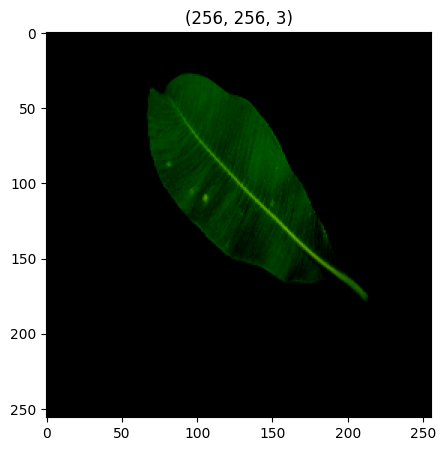

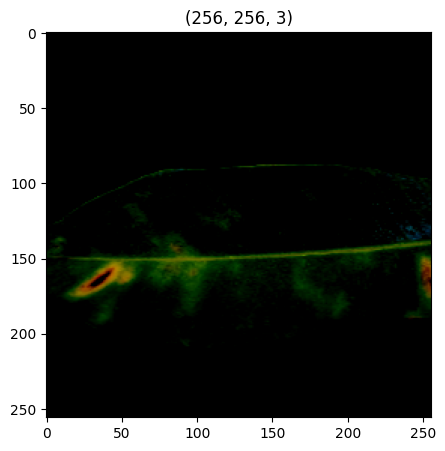

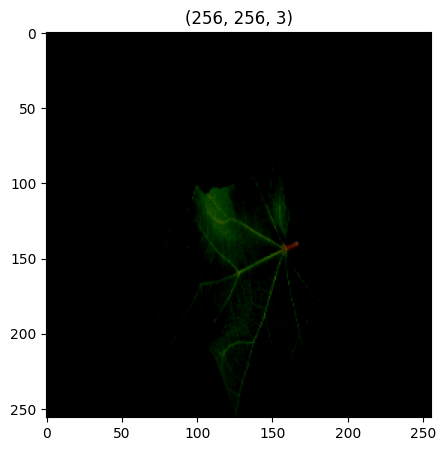

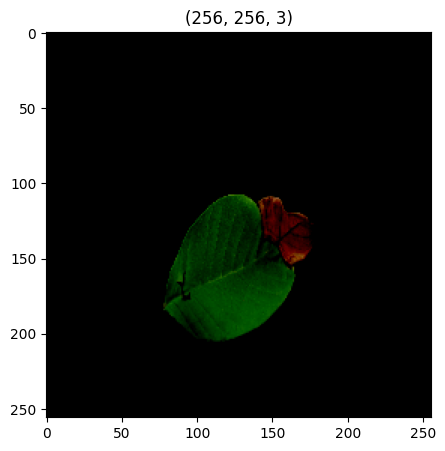

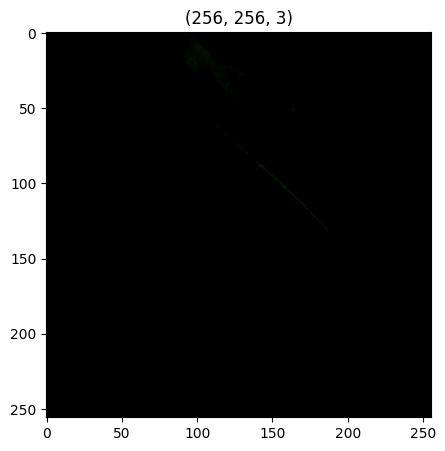

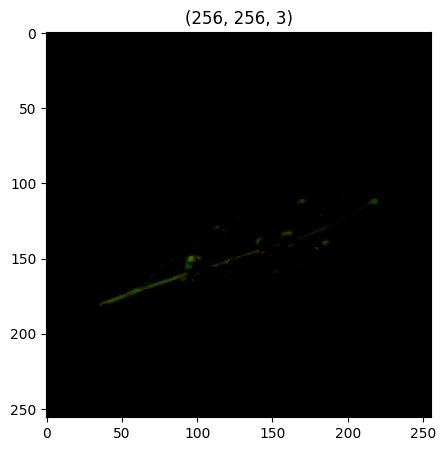

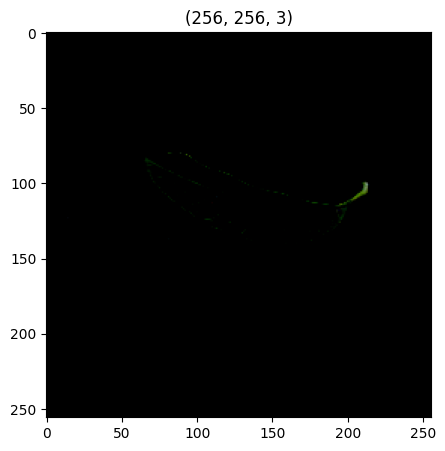

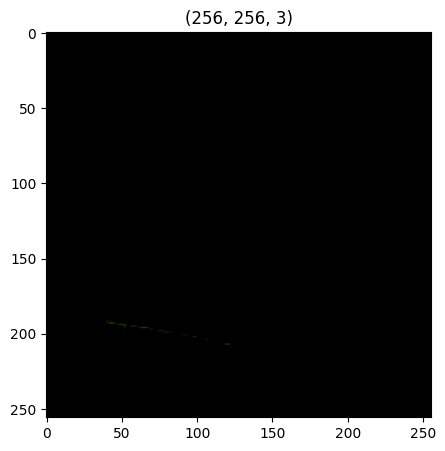

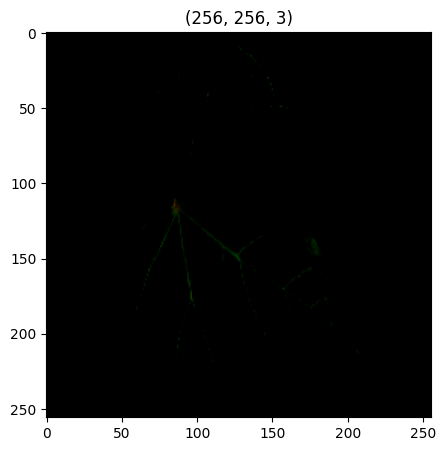

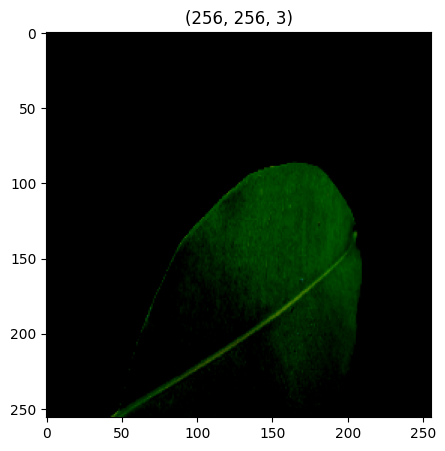

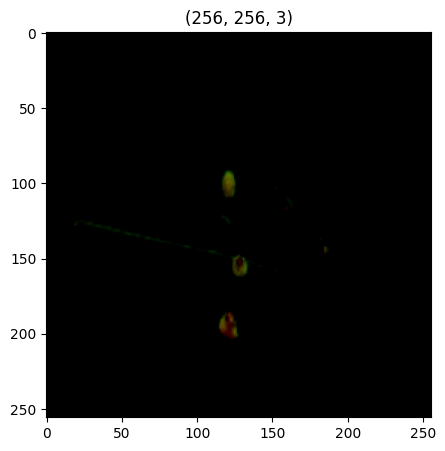

In [32]:
plotImage(t_img,label)

In [33]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor='accuracy',
                     verbose=1,
                     save_best_only=True)
es = EarlyStopping(monitor='accuracy',min_delta=0.01,
                   patience=5,
                   verbose=1)
cb = [mc,es]

In [34]:
his = model.fit_generator(train_data,steps_per_epoch=10,
                          epochs=25,
                          callbacks=cb)

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 20.6075 - accuracy: 0.2083
Epoch 1: accuracy improved from -inf to 0.20833, saving model to ./best_model.h5
10/10 [==============================] - 59s 5s/step - loss: 20.6075 - accuracy: 0.2083
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 7.8566 - accuracy: 0.4167
Epoch 2: accuracy improved from 0.20833 to 0.41667, saving model to ./best_model.h5
10/10 [==============================] - 51s 5s/step - loss: 7.8566 - accuracy: 0.4167
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 4.0788 - accuracy: 0.6028
Epoch 3: accuracy improved from 0.41667 to 0.60278, saving model to ./best_model.h5
10/10 [==============================] - 62s 6s/step - loss: 4.0788 - accuracy: 0.6028
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 2.9787 - accuracy: 0.7000
Epoch 4: accuracy improved from 0.60278 to 0.70000, saving model to ./best_model.h5
10/10 [=====================

In [34]:
from keras.models import load_model
model = load_model()


In [36]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

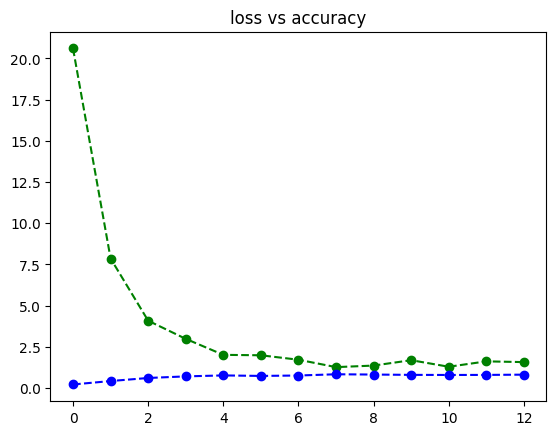

In [40]:
plt.plot(h['loss'],'go--')
plt.plot(h['accuracy'],'go--',color='blue')
plt.title("loss vs accuracy")
plt.show()

In [53]:
max_accuracy_index = h['accuracy'].index(max(h['accuracy']))
max_accuracy = h['accuracy'][max_accuracy_index]
print("The accuracy of the Model is:",max_accuracy)

The accuracy of the Model is  0.8277778029441833


In [81]:
path = "/content/dataset/dataset/test/Bael (P4)/0016_0014.JPG"
img = load_img(path,target_size = (256,256))
i = img_to_array(img)
im = preprocess_input(i)
img = np.expand_dims(im,axis=0)
pred =np.argmax( model.predict(img))
print("The Image Belong to: ",swapped_dict[pred])

1/1 [==============================] - 3s 3s/step
The Image Belong to:  Bael (P4)
